In [2]:
from fenics import *
import matplotlib.pyplot as plt 

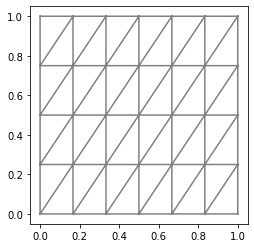

In [4]:
#armado de malla
mesh = UnitSquareMesh(6,4)
#espacio de funciones P1
V = FunctionSpace(mesh,"Lagrange",1)
plot(mesh)

In [7]:
#Condición de borde
u0 = Expression("1 + x[0]*x[0] + 2*x[1]*x[1]",degree=2)

def u0_boundary(x, on_boundary):
    return on_boundary

bc = DirichletBC(V, u0, u0_boundary)

In [8]:
#Definición del problema en forma debil
u = TrialFunction(V)
v = TestFunction(V)
f = Constant(-6.0)
a = inner(nabla_grad(u), nabla_grad(v))*dx
L = f*v*dx

Calling FFC just-in-time (JIT) compiler, this may take some time.
Solving linear variational problem.


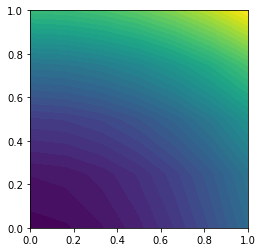

In [9]:
#Solver
u = Function(V)
solve(a == L, u, bc)
plot(u)

La descomposición LU (eliminación gaussiana) se utiliza de forma predeterminada para resolver sistemas lineales de ecuaciones en los programas FEniCS. Este es un método muy robusto y recomendado para unas pocas miles de incógnitas. en el sistema de ecuaciones y, por lo tanto, puede ser el método de elección en muchos problemas 2D y 3D más pequeños. Sin embargo, la descomposición de LU se vuelve lenta y demanda memoria en problemas grandes. Este hecho obliga al uso de métodos iterativos, que son más rápidos y requieren mucha menos memoria.

Los solucionadores de Krylov preacondicionados son un tipo de métodos iterativos populares a los que se puede acceder fácilmente en los programas FEniCS. La ecuación de Poisson da como resultado una matriz de coeficientes definidos positivos y simétrica, para la cual el solucionador de Krylov óptimo es el método del gradiente conjugado (CG). La factorización LU incompleta (ILU) es un preacondicionador general popular y robusto, así que probemos el par CG-ILU:

Solving linear variational problem.


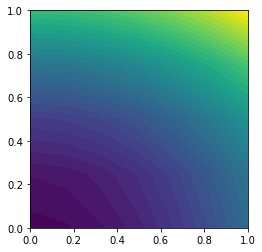

In [11]:
solve(a == L, u, bc, solver_parameters=dict(linear_solver="cg",preconditioner="ilu"))
plot(u)

Para ver otro parametros (por ejemplo de tolerancia) ir a pagina 23 del libro.

Solving linear variational problem.


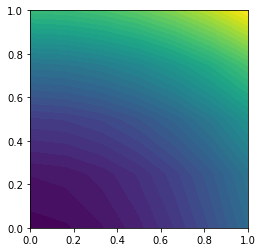

In [13]:
#otra manera de armar el solver
u = Function(V)
problem = LinearVariationalProblem(a, L, u, bc)
solver = LinearVariationalSolver(problem)
solver.solve()
plot(u)

Sabemos que una función de elementos finitos como $u$ se expresa como una combinación lineal de funciones de base $\phi_j$, que abarca el espacio $V$: $$\sum_{j=1}^{N}U_j\phi_j$$
Al escribir solve(a == L, u, bc) en el programa, se formará un sistema lineal a partir de $a$ y $L$, y este sistema se resuelve para $U_1,...,U_N$. Estos valores se conocen como grados de libertad de $u$. Para los elementos de Lagrange (y muchos otros tipos de elementos), $U_k$ es simplemente el valor de $u$ en el nodo con el número global $k$. (Los nodos y los vértices de las celdas coinciden para los elementos lineales de Lagrange, mientras que para los elementos de orden superior puede haber nodos adicionales en los lados y en el interior de las celdas).

In [22]:
#Teniendo u representado como un objeto Función, 
#podemos evaluar u(x) en cualquier vértice x en la malla, 
#o podemos tomar todos los valores Uj directamente por
nodal_values_u = u.vector()

In [26]:
#El resultado es un objeto vectorial DOLFIN, que es básicamente una encapsulación del objeto vectorial
#utilizado en el paquete de álgebra lineal que se utiliza para resolver el sistema lineal que surge 
#del problema variacional. Dado que programamos en Python, es conveniente convertir el objeto Vector 
#en una matriz numpy estándar para su posterior procesamiento.
array_u=u.vector().get_local()

In [27]:
#coordenadas de los vértices como una matriz numpy M × d,
#siendo M el número de vértices en la malla y d el número de dimensiones del espacio
mesh.coordinates() 

array([[0.        , 0.        ],
       [0.16666667, 0.        ],
       [0.33333333, 0.        ],
       [0.5       , 0.        ],
       [0.66666667, 0.        ],
       [0.83333333, 0.        ],
       [1.        , 0.        ],
       [0.        , 0.25      ],
       [0.16666667, 0.25      ],
       [0.33333333, 0.25      ],
       [0.5       , 0.25      ],
       [0.66666667, 0.25      ],
       [0.83333333, 0.25      ],
       [1.        , 0.25      ],
       [0.        , 0.5       ],
       [0.16666667, 0.5       ],
       [0.33333333, 0.5       ],
       [0.5       , 0.5       ],
       [0.66666667, 0.5       ],
       [0.83333333, 0.5       ],
       [1.        , 0.5       ],
       [0.        , 0.75      ],
       [0.16666667, 0.75      ],
       [0.33333333, 0.75      ],
       [0.5       , 0.75      ],
       [0.66666667, 0.75      ],
       [0.83333333, 0.75      ],
       [1.        , 0.75      ],
       [0.        , 1.        ],
       [0.16666667, 1.        ],
       [0.

In [29]:
#número de celdas (triángulos) en la malla
mesh.num_cells()

48

In [30]:
#número de vértices en la malla (con nuestra elección de elementos lineales de Lagrange, 
#esto es igual al número de nodos)
mesh.num_vertices()

35

In [39]:
#Ahora se puede escribir la solución en la pantalla mediante un bucle simple:
coor = mesh.coordinates()
if mesh.num_vertices() == len(array_u):
    for i in range(mesh.num_vertices()):
        print('u(%8g,%8g) = %g' % (coor[i][0], coor[i][1], array_u[i]))

u(       0,       0) = 3
u(0.166667,       0) = 2.125
u(0.333333,       0) = 3.02778
u(     0.5,       0) = 1.5
u(0.666667,       0) = 2.15278
u(0.833333,       0) = 3.11111
u(       1,       0) = 1.125
u(       0,    0.25) = 1.52778
u(0.166667,    0.25) = 2.23611
u(0.333333,    0.25) = 3.25
u(     0.5,    0.25) = 1
u(0.666667,    0.25) = 1.15278
u(0.833333,    0.25) = 1.61111
u(       1,    0.25) = 2.375
u(       0,     0.5) = 3.44444
u(0.166667,     0.5) = 1.02778
u(0.333333,     0.5) = 1.23611
u(     0.5,     0.5) = 1.75
u(0.666667,     0.5) = 2.56944
u(0.833333,     0.5) = 3.69444
u(       1,     0.5) = 1.11111
u(       0,    0.75) = 1.375
u(0.166667,    0.75) = 1.94444
u(0.333333,    0.75) = 2.81944
u(     0.5,    0.75) = 4
u(0.666667,    0.75) = 1.25
u(0.833333,    0.75) = 1.56944
u(       1,    0.75) = 2.19444
u(       0,       1) = 3.125
u(0.166667,       1) = 1.44444
u(0.333333,       1) = 1.81944
u(     0.5,       1) = 2.5
u(0.666667,       1) = 1.69444
u(0.833333,       1) =

Podemos armar la solución exacta $u_e = \sum_{j=1}^N E_j\phi_j$, donde $E_j = u_0(x_j, y_j)$, $(x_j, y_j)$ son las coordenadas del nodo $j$.

In [41]:
u_e = interpolate(u0, V)

In [46]:
import numpy as np
u_e_array = u_e.vector().get_local()
print("Max error:", np.abs(u_e_array - array_u).max())

Max error: 1.3322676295501878e-15


In [50]:
center = (0.5, 0.5)
print("numerical u at the center point:", u(center))
print("exact u at the center point:", u0(center))

numerical u at the center point: 1.750000000000001
exact u at the center point: 1.75


Si queremos normalizar la solución de modo que el valor máximo sea $1$. Entonces debemos dividir todos los valores de $U_j$ por $\max\{U_1,...,U_N\}$. El siguiente fragmento realiza la tarea:

In [53]:
max_u = array_u.max()
array_u /= max_u
u.vector()[:] = array_u
u.vector().set_local(array_u) # alternative
print(u.vector().get_local())

[0.75       0.53125    0.75694444 0.375      0.53819444 0.77777778
 0.28125    0.38194444 0.55902778 0.8125     0.25       0.28819444
 0.40277778 0.59375    0.86111111 0.25694444 0.30902778 0.4375
 0.64236111 0.92361111 0.27777778 0.34375    0.48611111 0.70486111
 1.         0.3125     0.39236111 0.54861111 0.78125    0.36111111
 0.45486111 0.625      0.42361111 0.53125    0.5       ]
